In [1]:
from funcs.notebook import *

from lightkurve import search_lightcurvefile
from altaipony.lcio import from_mast
from altaipony.flarelc import FlareLightCurve


/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
ff = pd.read_csv("../results/2020_02_flares_vetted.csv")
ff = ff.drop(["real?","note"], axis=1)
f = ff.dropna().drop_duplicates(subset=["ID", "qcs","istart"])
f

NumExpr defaulting to 8 threads.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points,ID,qcs,mission,tstamp,dur_detrend,lc_n
8,8318.0,8323.0,257978.0,257983.0,1585.761463,1585.768408,6.663345,0.543845,0.016775,0.006944,15290,GJ 1132,10,TESS,04_02_2021_12_55_04,5.070231,0
13,61073.0,61085.0,3678347.0,3678359.0,2078.925187,2078.927965,0.754213,0.042297,0.003964,0.002778,89725,GJ 143,28,TESS,05_02_2021_10_30_00,56.600531,0
23,9188.0,9191.0,496458.0,496461.0,1916.985504,1916.989671,0.668132,0.099933,0.002017,0.004167,15881,GJ 436,22,TESS,04_02_2021_13_19_56,6.225650,0
50,17317.0,17328.0,90451.0,90462.0,1353.087227,1353.102504,19.307381,1.226647,0.023652,0.015277,17376,HATS-14,1,TESS,04_02_2021_11_45_42,2.848574,0
80,17559.0,17563.0,170476.0,170480.0,1464.231243,1464.236798,24.828945,3.410916,0.065594,0.005556,17591,HATS-44,5,TESS,04_02_2021_11_50_21,4.947662,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,24692.0,24697.0,553045.0,553050.0,493.473444,493.476850,0.777978,0.049191,0.003623,0.003406,39718,Kepler-465,5,Kepler,16_02_2021_19_50_48,27.115912,1
6293,14016.0,14019.0,722571.0,722574.0,608.942267,608.944310,0.453530,0.038690,0.003296,0.002043,43282,Kepler-465,6,Kepler,16_02_2021_19_52_18,27.531090,2
6296,13082.0,13085.0,269511.0,269514.0,300.352863,300.354906,0.629769,0.049402,0.004649,0.002043,43977,Kepler-466,3,Kepler,16_02_2021_19_53_53,29.938169,1
6297,33745.0,33749.0,337785.0,337789.0,346.853894,346.856618,1.367471,0.047460,0.008701,0.002724,37615,Kepler-466,3,Kepler,16_02_2021_19_54_20,23.722981,2


In [3]:
f.shape, ff.dropna().shape

((2106, 17), (2106, 17))

In [4]:
gf = f[["ID","qcs","mission",'tstamp']].drop_duplicates(subset=["ID","qcs","mission"])

In [5]:
gf.shape

(795, 4)

In [974]:
row = gf.iloc[446]

# plot all flares for a light curve at once
ID, qcs = row.ID, int(row.qcs)
sdf = f[(f.qcs == qcs) & (f.ID == ID) & (f.mission == row.mission)]

lc = from_mast(ID,c=qcs,mission=row.mission,cadence="short",flux_type="PDCSAP_FLUX",
               download_dir="/home/ekaterina/Documents/001_science/lcs")

# make it a list of LCs even if only one LC is returned
if type(lc) == FlareLightCurve:

    lc = [lc]

elif type(lc) == list:

    lc = lc
tts = np.array([(l.time[0], l.time[-1]) for l in lc])
print(row.ID, row.qcs)

1% (248/32850) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (248/32850) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (28/6180) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (28/6180) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Kepler-219 17


/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-1.0.0-py3.6.egg/altaipony/lcio.py:102: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_science/lcs/mastDownload/Kepler/kplr009884104_sc_Q000000001330300002/kplr009884104-2013131215648_slc.fits' mode='rb' closefd=True>
  c)
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-1.0.0-py3.6.egg/altaipony/lcio.py:102: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_science/lcs/mastDownload/Kepler/kplr009884104_sc_Q000000001330300002/kplr009884104-2013121191144_slc.fits' mode='rb' closefd=True>
  c)


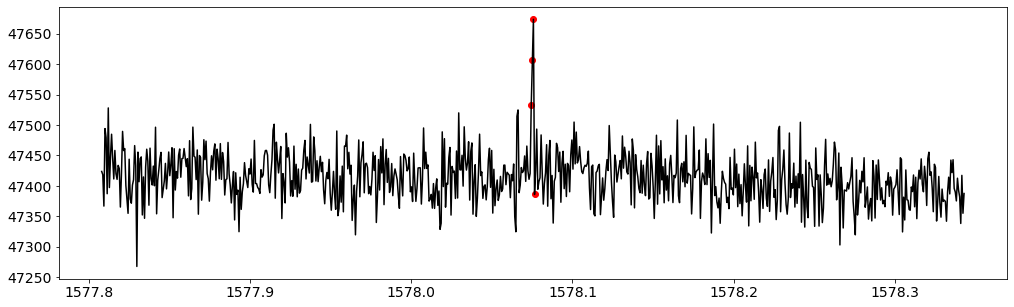

In [975]:
%matplotlib inline
for i, row in sdf.iloc[:].iterrows():
    plt.figure(figsize=(17,5))
    ts, tf = row.tstart, row.tstop
    
    # pick

    if row.mission=="TESS":
        LC = lc[0]
        cad=.2
    else:
        nlc = np.where((ts>tts)[:,0] != (ts>tts)[:,1])[0][0]
        LC = lc[nlc]
        cad=.75
    _ = LC[np.where((LC.time>=ts-.2/cad) & (LC.time<=tf+.2/cad))]
    plt.plot(_.time, _.flux, c="k")

    _ = LC[np.where((LC.time>=ts-1e-8) & (LC.time<=tf+1e-8))]
    plt.scatter(_.time, _.flux, c="r")
#     plt.ylim(18000,18500)

In [929]:
from lightkurve import search_targetpixelfile

In [930]:
tpf = search_targetpixelfile(ID,quarter=qcs,mission="Kepler").download_all()

3% (126/4573) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
3% (126/4573) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


In [931]:
tpf

TargetPixelFileCollection of 1 objects:
	6685609 (1 KeplerTargetPixelFiles) Quarters: 10

In [932]:
tpf[0].interact()

INFO:bokeh.server.server:Starting Bokeh server version 2.0.0 (running on Tornado 6.0.4)
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)


200 GET /autoload.js?bokeh-autoload-element=42560&bokeh-absolute-url=http://localhost:39023&resources=none (127.0.0.1) 248.52ms
101 GET /ws (127.0.0.1) 0.71ms
INFO:bokeh.server.views.ws:WebSocket connection opened
INFO:bokeh.server.views.ws:ServerConnection created


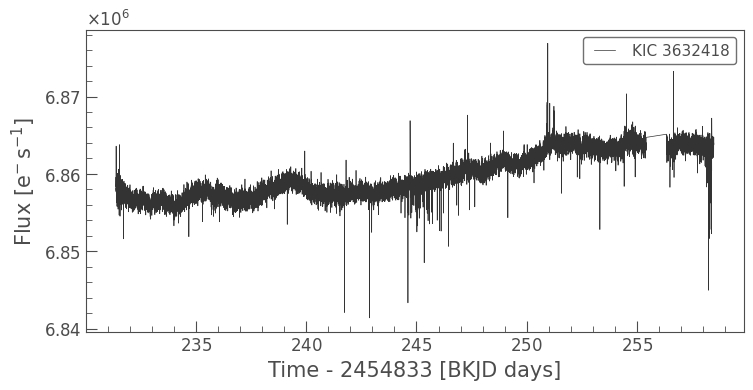

In [944]:
lc[0].plot()
# # plt.scatter(lc[0].time, lc[0].flux)
# plt.xlim(1282,1284)
# plt.ylim(282500,285500);

In [86]:
2e-3 * 60 * 24

2.88

In [984]:
ff = pd.read_csv("../results/2020_02_flares_vetted.csv")

In [985]:
_t =1578.07443258826


select = (ff.tstart > _t - 1e-3) & (ff.tstart < _t + 1e-3)

In [986]:
ff[select].groupby("note").count()

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points,ID,qcs,mission,tstamp,dur_detrend,lc_n,real?
note,,,,,,,,,,,,,,,,,,
marginal detection,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [987]:
ff[select].shape

(7, 19)

In [988]:
ff.loc[select, "note"] = "simultaneous FP in multiple Lcs"

In [989]:
ff.loc[select].groupby("note").count()

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points,ID,qcs,mission,tstamp,dur_detrend,lc_n,real?
note,,,,,,,,,,,,,,,,,,
simultaneous FP in multiple Lcs,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,3


In [990]:
ff.shape

(6307, 19)

In [991]:
ff.to_csv("../results/2020_02_flares_vetted.csv", index=False)